<a href="https://colab.research.google.com/github/babelfishz/ocalendar/blob/master/crawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install selenium

In [0]:
!apt-get install chromium-browser

In [0]:
!apt-get install chromium-chromedriver

In [9]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

opts = Options()
opts.add_argument('--no-sandbox')
opts.add_argument('--headless')
opts.add_argument('--disable-dev-shm-usage')
opts.add_argument("user-agent = 'Mozilla/5.0 (Windows NT 10.0; ) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'")

browser = webdriver.Chrome(options=opts)

url ='http://ppbc.iplant.cn'
browser.get(url = url)

#print(browser.title)

text = browser.find_element_by_id('txt_key1')
text.clear()
text.send_keys('多花脆兰')

button = browser.find_element_by_id('but_search2')
button.click()

info = browser.find_element_by_id('gdzwdesc')
#print(info.text)

results = browser.find_elements_by_css_selector('div.item_t')
urllist = []

for result in results:
  #print(result.text)
  target = result.find_element_by_tag_name('a').get_attribute('href')
  urllist.append(target)
  #print(target)

#print(browser.page_source)
#print(urllist)

for url in urllist[0:1]:
  browser.get(url = url)
  image = browser.find_element_by_css_selector('div.divcen').find_element_by_tag_name('img')
  img_src = image.get_attribute("src")
  print(img_src)
  #SavePic("1.png", img_src)

  header = {'Referer':url}
  content = requests.get(img_src, headers = header).content
  with open('1.jpg', 'wb') as f:
        f.write(content)

  print("1.jpg saved")

  #print(browser.page_source)

browser.quit()




http://img1.iplant.cn/image2/b/2535548.jpg
1.jpg saved


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info', 'text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


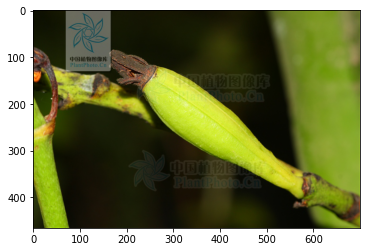

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
!ls -l

In [0]:
import requests
from lxml import html

name = '多花脆兰' 
url ='http://ppbc.iplant.cn/list?'+ name
page = requests.get(url = url)
#tree=html.fromstring(page.text)

print(page.text)